In [4]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.cm import get_cmap

from dendrons_pore import dendrons_pore
from create_in import create_in
from out_reader import out_reader

Параметры

In [5]:
Cs_range = [0.001, 0.003, 0.007]
chi = 0.5
alpha = 0.5
S = 150

D = 170
N = 300
q = 2

g_range = [0, 1, 2, 3]

Аналитическая теория

In [6]:
psi_dif_cs_g, generation = {}, {}
for g in g_range:
    psi_dif_cs = {}
    for cs in  Cs_range:
            N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons,\
                    psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, rho_dendrons = dendrons_pore(
                            Cs = cs,
                            #параметры щетки
                            alpha = alpha,
                            S = S,
                            
                            #параметры поры
                            D = D,
                            
                            #параметры дендрона
                            g = g,
                            q = q,
                            n_base = 1,
                            N_opt = N)
            r = np.hstack((r_in_dendrons, r_out_dendrons))
            psi_dendr = np.hstack((psi_in_dendrons, psi_out_dendrons))
            
            psi_dif_cs[cs] = (r, psi_dendr)
            
    psi_dif_cs_g[g] = (psi_dif_cs)
    generation[g] = (n)

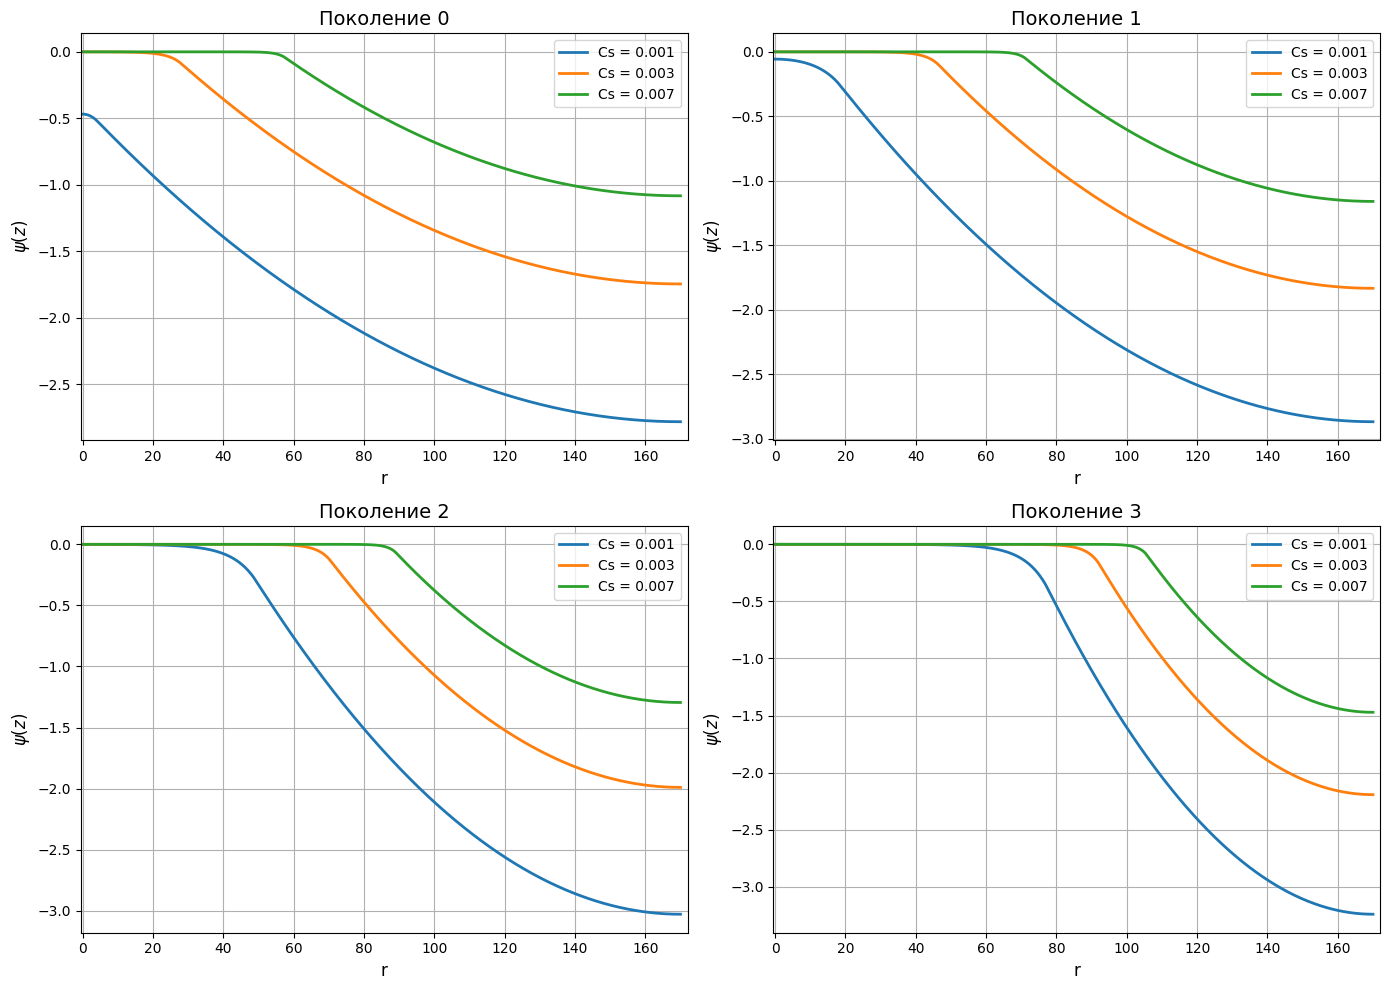

In [11]:
# Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 окна
axes = axes.flatten()  # Преобразование в 1D для удобства итерации

for i, g in enumerate(g_range):
    ax = axes[i]
    psi_dif_cs = psi_dif_cs_g[g]

    for cs, (r, psi_dendr) in psi_dif_cs.items():
        ax.plot(r, psi_dendr, label=f"Cs = {cs}", linewidth=2)
    
    ax.set_xlim(-0.5, D+2)  # Установка диапазона оси X
    ax.set_title(f"Поколение {g}", fontsize=14)
    ax.set_xlabel("r", fontsize=12)
    ax.set_ylabel(r"$\psi(z)$", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True)

# Настройка пространства между окнами
plt.tight_layout()
plt.show()